# **MNIST From Scratch**
#### **Heitor Barroso Cavalcante**


Nessa implementação, segui o seguinte padrão de arquitetura de Rede Neural para identificação de dígitos manuscritos:
* Camada de input → com 784 neurônios
* 1ª Camada oculta → com 50 neurônios e função de ativação sigmoide
* 2ª Camada oculta → com 10 neurônios e função de ativação softmax
* Camada de output → com 10 neurônios

A função softmax foi a escolhida para essa aplicação pois estamos resolvendo um problema de classificação com múltiplas classes – 10. (Decidir qual dígito uma imagem representa: 0,1,2, ... ,9)

Para contextualizar essa implementação, utilizaremos a notação empregada pelo professor Yaser S. Abu-Mostafa, em que, no processo de Forward Propagation:

* $\text{W}^{(l)}$ é uma matriz de dimensão $\left(d^{(l-1)}+1\right) \times d^{(l)}$
* $\textbf{x}^{(l)}$ é um vetor e possui dimensão $\left(d^{(l)} + 1\right) \times 1$
* $\textbf{s}^{(l)} = \left(\text{W}^{(l)}\right)^T\textbf{x}^{(l-1)}$

Dessa maneira, teremos duas matrizes de pesos: $\text{W}^{(1)}$ e $\text{W}^{(2)}$ e:
* $d^{(0)} = 784$ (camada de input)
* $d^{(1)} = 50$ (1ª camada oculta)
* $d^{(2)} = 10$ (2ª camada oculta e de output)

Agora, na parte de Backpropagation, como a função de ativação da última camada da rede é a Softmax, a função de erro escolhida é advinda dessa função. Voltando ao texto Fundamentos de Redes Neurais, uma das premissas para utilizarmos o algoritmo de backpropagation é que a função de erro deve poder ser representada como a média dos erros em cada exemplo considerada no batch de treinamento. Nesse sentido, observe que a função de erro deduzida para a Softmax respeita tal premissa:

$$L({\bf w}) = -\dfrac{1}{N}\sum^N_{i=1}\sum^K_{q=1}y^{(i)}_q\ln(\hat{y}^{(i)}_q)$$

Perceba que em Backpropagation, à função de erro utilizada é referente ao erro de um único exemplo de treinamento, então, não precisamos variar os índices $(i)$ e nem tirar sua média. Portanto, para esse algoritmo, teremos:

* $\text{e} = -\sum^K_{q=1}y_q\ln(\hat{y}_q)$
* $\delta^{(L)} =  \dfrac{\partial \text{e}}{\partial \textbf{s}^{(L)}} $
* $\delta^{(l)} = \sigma'(\textbf{s}^{(l)})\otimes\begin{bmatrix} \text{W}^{(l+1)}\delta^{(l+1)}\end{bmatrix}^{d(l)}_1$


Assim, para iniciar todo o processo de Backpropagation, vamos calcular $\delta^{(L)} =  \dfrac{\partial \text{e}}{\partial \textbf{s}^{(L)}}$.

## **Derivação da função de erro em relação à** $\mathbf{s}^{(L)}$

Queremos derivar $\text{e}$ em relação ao vetor $\mathbf{s}^{(l)}$. Disso, temos:

$$\dfrac{\partial \text{e}}{\partial \textbf{s}^{(L)}} = \begin{bmatrix} \dfrac{\partial \text{e}}{\partial s^{(L)}_1} \\
\dfrac{\partial \text{e}}{\partial s^{(L)}_2} \\
\vdots \\
\dfrac{\partial \text{e}}{\partial s^{(L)}_K}\end{bmatrix}$$

então, buscamos $\dfrac{\partial \text{e}}{\partial s^{(L)}_j}$ para $j=1,\ldots,K$.

Disso, tomemos um elemento $j$ arbitrário:

$$
\dfrac{\partial \text{e}}{\partial s^{(L)}_j} =   \dfrac{\partial }{\partial s^{(L)}_j}\left(-\sum^K_{q=1}y_q\ln(\hat{y}_q)\right) = -\sum^K_{q=1}y_q \dfrac{\partial }{\partial s^{(L)}_j} \left(\ln(\hat{y}_q)\right)
$$

Perceba que $\hat{y} = \mathbf{x}^{(l)} = \sigma\left(  \mathbf{s}^{(l)} \right)$, onde $\sigma$ é a função de ativação da última camada (Softmax).

Nesse sentido, no caso da Rede Neural, $s^{(L)}_j$ é o valor de entrada do neurônio $j$ da sua última camada. Então,

$$
s^{(L)}_j = \sum^K_{n=0}w_{nj}^{(L)}x^{(L-1)}_n = \left(\text{W}^{(L)}\right)_j^T\mathbf{x}^{(L-1)}
$$

Ou seja, o produto do vetor linha $j$ da matriz $\left(\text{W}^{(L)}\right)^T$ pelo vetor coluna $\mathbf{x}^{(L-1)}$.

Perceba que essa é, justamente, a noção envolvida no processo de formulação da função Softmax, onde para $K$ classes, havia $K$ vetores de peso, um para cada possível saída da função. Nesse caso, cada vetor de peso é representado por uma linha dessa matriz. Portanto, a seguinte expressão para a função Softmax:

$$
\hat{p}_j = \dfrac{e^{\mathbf{w}_j^T\mathbf{\tilde{x}}}}{\sum^K_{i=1}e^{\mathbf{w}_i^T\mathbf{\tilde{x}}}}
$$

No caso de Redes Neurais, se transforma em:

$$
\sigma\left(s^{(L)}_j\right) = \dfrac{e^{s^{(L)}_j}}{\sum^K_{i=1}e^{s^{(L)}_i}}
$$

Isso quer dizer que, para qualquer $j$ e qualquer $q$, 
$
\ln(\hat{y}^{(i)}_q) = \ln\left(\sigma\left(s^{(L)}_q\right)\right)
$
está em função de $s^{(L)}_j$. Então:

$$
\dfrac{\partial }{\partial s^{(L)}_j} \ln\left(\sigma\left(s^{(L)}_q\right)\right) = \dfrac{1}{\sigma\left(s^{(L)}_q\right)} \cdot \dfrac{\partial }{\partial s^{(L)}_j} \sigma\left(s^{(L)}_q\right)
$$

Agora, para obter $\dfrac{\partial }{\partial s^{(L)}_j} \sigma\left(s^{(L)}_q\right)$, temos dois casos:

$1) q = j:$
$$
\dfrac{\partial }{\partial s^{(L)}_q} \sigma\left(s^{(L)}_q\right) = \dfrac{\partial }{\partial s^{(L)}_q} \left(\dfrac{e^{s^{(L)}_q}}{\sum^K_{i=1}e^{s^{(L)}_i}}\right)
$$

Usando a regra do quociente:

$$
\dfrac{\partial }{\partial s^{(L)}_q} \sigma\left(s^{(L)}_q\right) = \dfrac{\sum^K_{i=1}e^{s^{(L)}_i} \cdot \dfrac{\partial }{\partial s^{(L)}_q} e^{s^{(L)}_q} -  e^{s^{(L)}_q} \cdot  \dfrac{\partial }{\partial s^{(L)}_q} \sum^K_{i=1}e^{s^{(L)}_i}}{\left(\sum^K_{i=1}e^{s^{(L)}_i}\right)^2} = \dfrac{e^{s^{(L)}_q} \cdot \sum^K_{i=1}e^{s^{(L)}_i} - e^{s^{(L)}_q} e^{s^{(L)}_q}}{\left(\sum^K_{i=1}e^{s^{(L)}_i}\right)^2} = \dfrac{e^{s^{(L)}_q}\left( \sum^K_{i=1}e^{s^{(L)}_i} - e^{s^{(L)}_q}\right)}{\left(\sum^K_{i=1}e^{s^{(L)}_i}\right)^2}
$$

$$
\dfrac{\partial }{\partial s^{(L)}_q} \sigma\left(s^{(L)}_q\right) = \sigma\left(s^{(L)}_q\right) \cdot \dfrac{\sum^K_{i=1}e^{s^{(L)}_i} - e^{s^{(L)}_q}}{\sum^K_{i=1}e^{s^{(L)}_i}} = \sigma\left(s^{(L)}_q\right) \cdot \left(\dfrac{\sum^K_{i=1}e^{s^{(L)}_i}}{\sum^K_{i=1}e^{s^{(L)}_i}} - \dfrac{e^{s^{(L)}_q}}{\sum^K_{i=1}e^{s^{(L)}_i}}\right) = \sigma\left(s^{(L)}_q\right) \left(1 - \sigma\left(s^{(L)}_q\right)\right)
$$

$2) q \neq j$:
$$
\dfrac{\partial }{\partial s^{(L)}_j} \sigma\left(s^{(L)}_q\right) = \dfrac{\sum^K_{i=1}e^{s^{(L)}_i} \cdot \dfrac{\partial }{\partial s^{(L)}_j} e^{s^{(L)}_q} - e^{s^{(L)}_q} \dfrac{\partial }{\partial s^{(L)}_j} \sum^K_{i=1}e^{s^{(L)}_i} }{\left( \sum^K_{i=1}e^{s^{(L)}_i} \right)^2} = - \dfrac{e^{s^{(L)}_q} \cdot e^{s^{(L)}_q}}{\left( \sum^K_{i=1}e^{s^{(L)}_i} \right)^2} = - \sigma\left(s^{(L)}_q\right) \cdot \sigma\left(s^{(L)}_j\right)
$$

Então, juntando os resultados obtidos, temos o que segue:

$$
\dfrac{\partial \text{e}}{\partial s^{(L)}_j} = -\sum^K_{q=q}y_q \dfrac{\partial }{\partial s^{(L)}_j} \left(\ln(\hat{y}_q)\right) =  -\sum^K_{q=1}y_q   \dfrac{1}{\sigma\left(s^{(L)}_q\right)} \cdot \dfrac{\partial }{\partial s^{(L)}_j} \sigma\left(s^{(L)}_q\right)  =     -\left( y_j \cdot \dfrac{1}{\hat{y}_j} \cdot \hat{y}_j\left(1-\hat{y}_j\right) + \sum_{\substack{q = 1 \\ q \neq j}}^K y_q \cdot \dfrac{1}{\hat{y}_q} \cdot \left( - \hat{y}_q \cdot \hat{y}_j\right) \right)
$$

Sendo o primeiro termo da soma presente na última igualdade referente ao caso em que $q=j$ e o segundo termo (somatório) referente ao caso em que $q \neq j$.

Aqui, o que fizemos foi abrir o somatório originais em dois para contemplarmos as duas situações da derivação.

$$
\dfrac{\partial \text{e}}{\partial s^{(L)}_j} = y_j \hat{y}_j -  y_j + \sum_{\substack{q = 1 \\ q \neq j}}^K y_q \hat{y}_j
$$

Agora, podemos recolocar o termo $y_j \hat{y}_j$ no somatório, de modo que ele volte a passar por todos os valores, de $q=1$ até $K$.  

$$
\dfrac{\partial \text{e}}{\partial s^{(L)}_j} = -  y_j + \sum_{q=1}^K y_q \hat{y}_j
$$

Sabendo que $\mathbf{y}$ é um vetor One-Hot Encoded, um único elemento terá valor $1$. Por isso, 
$$
\sum_{q=1}^K y_q \hat{y}_j = \hat{y}_j
$$
Portanto:

$$
\dfrac{\partial \text{e}}{\partial s^{(L)}_j} = \hat{y}_j -  y_j 
$$

Agora que conseguimos obter uma expressão para $\delta^{(L)} =  \dfrac{\partial \text{e}}{\partial \textbf{s}^{(L)}}$, que inicia o processo de Backpropagation, podemos dar prosseguimento na implementação do projeto.

##### **Sobre o dataset:**

Primeiramente, é necessário evidenciar que o dataset utilizado não foi, de fato o do MNIST. No caso, no dataset utilizado, há 42000 imagens rotuladas disponíveis para o usuário explorar – no lugar das 60000 para treinamento e 10000 para teste do MNIST. Isso porque, tal dataset faz parte dos recursos de uma competição de Ciência de Dados, em que as 28000 imagens restantes (42000 + 28000 = 60000 + 10000 = 70000) foram utilizadas para avaliar o desepenho dos participantes.

## **Implementação**

Agora, partindo, de fato para a implementação, primeiramente importamos as bibliotecas utilizadas no projeto (Numpy para manipulação de matrizes e Pandas para leitura dos dados).

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/MNIST/digitos.csv')


In [2]:
print(data.shape)
m, n = data.shape

(42000, 785)


### **Etapa de tratamento dos dados:**
O objetivo nessa parte do projeto é fazer com que cada elemento ${\tt Y\_train[i]}$ seja um escalar representando o rótulo do dígito do elemento ${\tt X\_train[i]}$, que deve ser um vetor coluna$(784 \times 1)$. O mesmo se aplica para os conjuntos de teste e validação.

In [3]:
data = np.array(data)
conjunto_de_teste = data[0:1000].T
Y_teste = conjunto_de_teste[0]
X_teste_aux = conjunto_de_teste[1:n]

conjunto_de_validação = data[1000:2000].T
Y_validação = conjunto_de_teste[0]
X_validação_aux = conjunto_de_teste[1:n]


conjunto_de_treino = data[2000:m].T
Y_train = conjunto_de_treino[0]
X_aux = conjunto_de_treino[1:n]

In [4]:
X_teste = []
for i in range(len(X_teste_aux[0])):
  aux = np.reshape(X_teste_aux[0:784, i], (784, 1))
  X_teste.append(aux)
X_teste = np.array(X_teste)


X_validação = []
for i in range(len(X_validação_aux[0])):
  aux = np.reshape(X_validação_aux[0:784, i], (784, 1))
  X_validação.append(aux)
X_validação = np.array(X_validação)


X_train = []
for i in range(len(X_aux[0])):
  aux = np.reshape(X_aux[0:784, i], (784, 1))
  X_train.append(aux)
X_train = np.array(X_train)
X_train = X_train / 255.

In [5]:
print(Y_train)

[3 1 6 ... 7 6 9]


In [6]:
print(X_train[0].shape)

(784, 1)


### **Visualização:**

Nesse ponto, os dados já estão tratados e, para efeito de ilustração, podemos visualizar um par $({\tt X\_train[i]}, {\tt Y\_train[i]})$. Representados, respectivamente por uma imagem e seu rótulo (label).

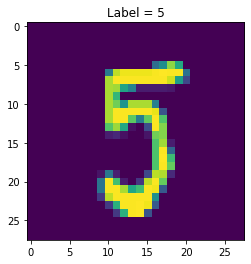

In [7]:
imagem_de_treino = np.reshape(X_train[4], (28, 28))
_ = plt.figure(figsize=(4, 4))
_ = plt.imshow(np.array(imagem_de_treino))
_ = plt.title(f"Label = {Y_train[4]}")

### **One-Hot encoding:**
Agora, como discutido na seção sobre classficação multinomial, é importante codificar os rótulos dos exemplos seguindo a o padrão One-Hot. Isso é realizado nesse ponto do projeto.

In [8]:
def one_hot(y):
    one_hot_y = np.zeros((10,1))
    one_hot_y[y] = 1
    return one_hot_y

In [9]:
y = Y_train[0]
print(y)
one_hot_y = one_hot(y)
print(one_hot_y)
print(one_hot_y.shape)

3
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(10, 1)


Com a função ${\tt ajeita\_dados\_de\_treino(X\_train, Y\_train)}$, inserimos um elemento $x_0 = 1$ em cada vetor de input. Isso é feito unica e exclusivamente por causa do modo de implementação de Redes Neurais presentes no livro do professor Mustafa. Além disso, como já comentado, fazemos com que cada escalar ${\tt Y\_train[i]}$ seja "hot-encoded".

In [10]:
def ajeita_dados_de_treino(X_train, Y_train):
  novo_X = [] ; novo_Y = []
  for i in range(len(X_train)):
    novo_X.append(np.insert(X_train[i], 0, 1, 0))
    novo_Y.append(one_hot(Y_train[i]))
  return np.array(novo_X), np.array(novo_Y)

In [11]:
X_train, Y_train = ajeita_dados_de_treino(X_train, Y_train)

Agora, chegamos à essência da Rede Neural, aqui há a maior parte dos métodos utilizados no projeto, tanto para atualização dos prâmetros do modelo (Backpropagation) quanto para a predição de valores (Forward Propagation).

In [12]:
def init_params():
  W1 = np.random.uniform(low=-1, high=1, size=(785, 50))
  W2 = np.random.uniform(low=-1, high=1, size=(51, 10))
  return W1, W2

def sigmoide(z):
  return 1.0/(1.0 + np.exp(-z))

def sigmoide_linha(z):
  return sigmoide(z)*(1 - sigmoide(z))

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def ReLU(z):
  return np.maximum(z, 0)

def ReLU_linha(z):
  return z > 0

def NLL(Y, Y_hat):
  return -np.dot(Y.T, np.log(Y_hat))


def forward_prop(W1, W2, x):
  s1 = np.dot(W1.T, x)
  x1 = sigmoide(s1) ; x1 = np.insert(x1, 0, 1, 0)
  #x1 = ReLU(s1) ; x1 = np.insert(x1, 0, 1, 0)
  s2 = np.dot(W2.T, x1)
  x2 = softmax(s2)
  return s1, x1, s2, x2


def back_prop(s1, x1, W1, s2, x2, W2, x, y):
  #sens2 = 2*(x2 - y)
  #e = (x2 - y)**2
  e = NLL(y, x2)
  sens2 = x2 - y
  sens1 = sigmoide_linha(s1)*(np.delete(np.dot(W2, sens2), 0, 0))
  #sens1 = ReLU_linha(s1)*(np.delete(np.dot(W2, sens2), 0, 0))
  dW1 = np.dot(x, sens1.T)
  dW2 = np.dot(x1, sens2.T)
  return dW1, dW2, e

def update_params(W1, W2, dW1, dW2, eta):
  normaW1 = np.linalg.norm(dW1) ; normaW2 = np.linalg.norm(dW2)
  if normaW1 != 0 and normaW2 != 0:
    W1 = W1 - eta * (dW1/np.linalg.norm(dW1))
    W2 = W2 - eta * (dW2/np.linalg.norm(dW2))
  else:
    W1 = W1 - eta * dW1
    W2 = W2 - eta * dW2
  return W1, W2

Agora, há alguns métodos auxiliares simples para metrificação do desempenho da rede neural.

In [13]:
def get_prediction(x2):
  return np.argmax(x2)

def junta_dados(X_train, Y_train):
  training_data = []
  for i in range(len(X_train)):
    training_data.append((X_train[i], Y_train[i]))
  return training_data

def get_accuracy(W1, W2, X_validacao, Y_validacao):
  cont = 0 ; m = len(X_validação)
  for i in range(m):
    x = np.insert(X_validacao[i], 0, 1, 0)
    s1, x1, s2, x2 = forward_prop(W1, W2, x)
    y_hat = get_prediction(x2)
    if y_hat == Y_validacao[i]:
      cont += 1
  return cont

Aqui está o método de treinamento da rede neural. Estamos usando *Mini Batch Stochastic Descent*. Esse método retorna as últimas matrizes de pesos obtidas e listas dos valores de acurácia e de erro observados em cada Época, para usarmos no processo de avaliação do modelo.

In [14]:
def treinamento_mini_batch(X_train, Y_train, X_validacao, Y_validacao, eta, epochs, mini_batch_size):
  tamanho_validacao = len(X_validacao)
  tamanho_treino = len(X_train)

  erros = []
  acuracias = []

  
  W1, W2 = init_params()
  training_data = junta_dados(X_train, Y_train)
  for epoch in range(epochs):
    random.shuffle(training_data)
    mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
    e = 0
    for i in range(len(mini_batches)):
      dW1 = 0 ; dW2 = 0
      for j in range(mini_batch_size):
        x = mini_batches[i][j][0]
        y = mini_batches[i][j][1]
        s1, x1, s2, x2 = forward_prop(W1, W2, x)
        aux_dW1, aux_dW2, aux_e = back_prop(s1, x1, W1, s2, x2, W2, x, y)
        dW1 += aux_dW1 ; dW2 += aux_dW2 ; e += aux_e

      dW1 = dW1 / mini_batch_size ; dW2 = dW2 / mini_batch_size
      W1, W2 = update_params(W1, W2, dW1, dW2, eta)
    acuracia = get_accuracy(W1, W2, X_validacao, Y_validacao)
    erro = e[0][0]/tamanho_treino
    if epoch % 10 == 0 or epoch == 69:
      print(f"Epoch {epoch}: acuracia={acuracia}/{tamanho_validacao} ; erro={erro}")
    erros.append(erro) ; acuracias.append(acuracia/tamanho_validacao)

  return W1, W2, erros, acuracias

In [15]:
W1, W2, erros, acuracias = treinamento_mini_batch(X_train, Y_train, X_validação, Y_validação, 0.1, 70, 5)

<ipython-input-12-2647c382e178>:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


Epoch 0: acuracia=338/1000 ; erro=0.05341339703874045
Epoch 10: acuracia=812/1000 ; erro=0.009685601097149962
Epoch 20: acuracia=840/1000 ; erro=0.008764279470810961
Epoch 30: acuracia=870/1000 ; erro=0.00823083139705642
Epoch 40: acuracia=873/1000 ; erro=0.007733886708846824
Epoch 50: acuracia=888/1000 ; erro=0.005684212964049704
Epoch 60: acuracia=893/1000 ; erro=0.008196172208076204
Epoch 69: acuracia=897/1000 ; erro=0.006266744060006339


### **Resultados:**

Como uma forma de mensurar o desempenho do modelo, podemos plotar os valores de erro e acurácia ao longo das Épocas:

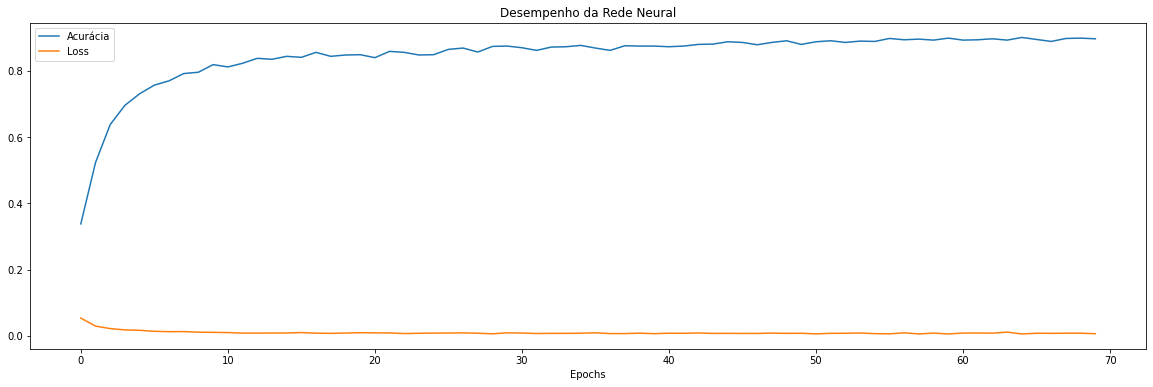

In [16]:
_ = plt.figure(figsize=(20, 6))
_ = plt.plot(acuracias, label="Acurácia")
_ = plt.plot(erros, label="Loss")
_ = plt.title("Desempenho da Rede Neural")
_ = plt.xlabel("Epochs")
_ = plt.legend()

Agora, vejamos se a performance observada durante o treinamento se traduz para dados inéditos:

In [17]:
def testa_acuracia(W1, W2, X_teste, Y_teste, amostras_plot=40):
  cont = 0
  n = len(X_teste)
  yhats = []
  for i in range(0, n):
    s1, x1, s2, x2 = forward_prop(W1, W2, np.insert(X_teste[i], 0, 1, 0))
    if(np.argmax(x2) == Y_teste[i]):
      cont += 1
    if i < amostras_plot:
      aux = (np.argmax(x2), np.reshape(X_teste[i], (28,28)))
      yhats.append(aux)

  return cont/n, yhats

In [18]:
acuracia_testes, yhats = testa_acuracia(W1, W2, X_teste, Y_teste)
print(f"Perceba que obtemos uma acurácia de {acuracia_testes*100}% em imagens inéditas. Isso quer dizer que o modelo obtido é bem generalizável para dados novos.")

Perceba que obtemos uma acurácia de 89.7% em imagens inéditas. Isso quer dizer que o modelo obtido é bem generalizável para dados novos.


<ipython-input-12-2647c382e178>:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


Vejamos uma demonstração desse resultado nas primeiras 40 imagens do conjunto de teste:

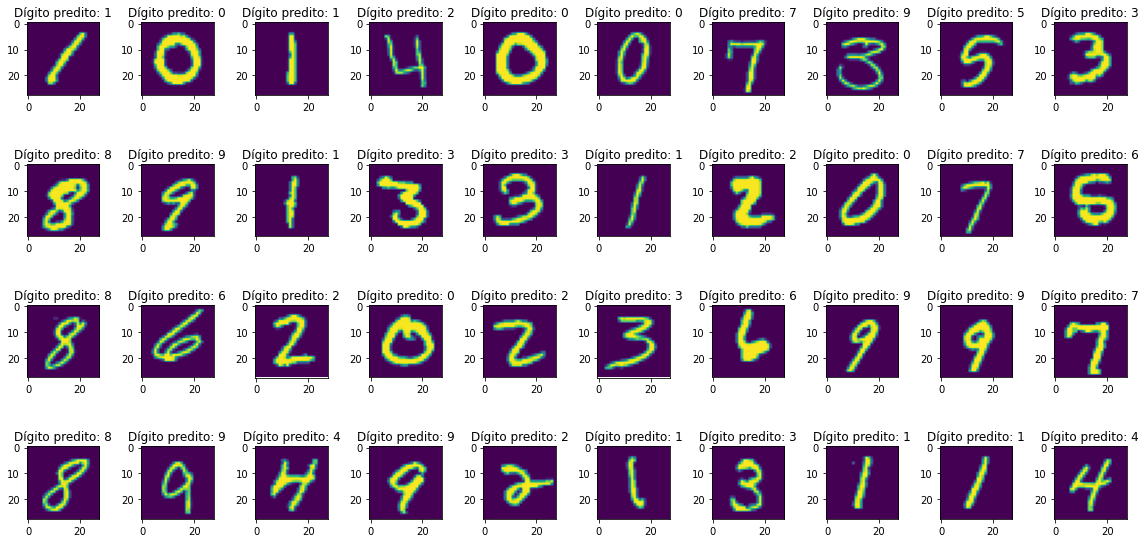

In [19]:
fig, ax = plt.subplots(4, 10, figsize=(16, 8))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.title(f"Dígito predito: {yhats[i][0]}")
  plt.imshow(yhats[i][1])

fig.tight_layout()
plt.show()